# **Tutorial for DICGrid model component**

DIC Grid serves for reading the data available as a sequence of files with displacement measurements stored in a directory, accompanied with the measured load deflection curve. It refers to the `BeamDesign` object defining the design of the reinforced beam. By combining the information from the optical measurement with statical scheme, geometry and reinforcement layout, this model component serves 
further analysis by providing the correct **load-space-time** databasis.

In [1]:
%matplotlib widget
import matplotlib.pylab as plt

Let us construct a grid example and render the interactive interface showing the measured displacmeent at the maximum load $t = 1$ and with displacement amplified by a factor $U_\mathrm{factor} = 100$. 

In [2]:
from dic_grid import DICGrid
dic_grid = DICGrid(U_factor=100, dir_name='B7_TV1', t=1)
dic_grid.interact()

Note that the orange markers denote the states with available DIC measurements performed during the history of loading.

## Read data format

### Input directory structure

The `DICGrid` objects reads the data from a directory named as `dir_name`

In [3]:
dic_grid.dir_name

'B7_TV1'

The property trait `data_dir` assembles the path to the data directory using path starting in the home directory, i.e. 

```join(dic_grid.home_dir, 'simdb', 'data', 'shear_zone', dic_grid.dir_name)```

For the current example, we obtain

In [4]:
dic_grid.data_dir

'/home/rch/simdb/data/shear_zone/B7_TV1'

To get the directory with the DIC data, issue 

In [5]:
dic_grid.dic_data_dir

'/home/rch/simdb/data/shear_zone/B7_TV1/dic_data'

### Load deflection response

To obtain the directory with the load deflection curve, use

In [6]:
dic_grid.Fw_data_dir

'/home/rch/simdb/data/shear_zone/B7_TV1/load_deflection'

### Beam parameters
File specifying the beam parameters is assessed using the property traits `beam_param_fie` and is named `beam_params.txt` by default

In [7]:
dic_grid.beam_param_file

'/home/rch/simdb/data/shear_zone/B7_TV1/beam_params.txt'

This file specifies the parameters 
 - length $L$
 - width $B$
 - depth $H$
 - number of reinforcement bars $n_\mathrm{s}$
 - vertical position of the bars $y_\mathrm{s}$
 - diameter of the reinforcement $d_\mathrm{s}$

In [8]:
dic_grid.beam_param_types

{'L': float, 'B': float, 'H': float, 'n_s': float, 'y_s': float, 'd_s': float}

Currently, to setup the beam parmaters correctly, a call to `read_beam_design` must be assued using

In [9]:
dic_grid.read_beam_design()

**Note** This need should be avoided later by capturing the dependency with respect to the `data_dir` attribute. Currently, the notification mechanism does not allow this because of are further dependency links.

The beam design object is available in the attribute `sz_bd`. The type of the `RCBeamDesign` is general and specifies also the material models associated with individual material components.

The parameters relevant for correct configuration of the `dic_grid` within the beam design are the length and offset with respect the beam bounaries 

In [10]:
dic_grid.L_x, dic_grid.L_y

(1254.0, 286.0)

### Grid parameters

File specifying the grid data parameters is accessed using the property trait `grid_param_file` and is named
`grid_params.txt` by default.

In [11]:
dic_grid.grid_param_file

'/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/grid_params.txt'

This file contains the name-value pairs of the attributes defined by the `grid_param_types` dictionary

In [12]:
dic_grid.grid_param_types

{'n_x': int,
 'n_y': int,
 'd_x': float,
 'd_y': float,
 'x_offset': float,
 'y_offset': float,
 'column_first_enum': <function dic_grid.convert_to_bool(str_bool)>,
 'top_down_enum': <function dic_grid.convert_to_bool(str_bool)>}

Thus, the `grid_params` of the current test `B7_TV1` read

In [13]:
dic_grid.grid_params

{'n_x': 58,
 'n_y': 14,
 'd_x': 22.0,
 'd_y': 22.0,
 'x_offset': 12.0,
 'y_offset': 21.0,
 'column_first_enum': False,
 'top_down_enum': False}

The DIC data files corresponding to each measured step are assembled in the string list `files` 

These parameters are available as properties and can be accessed via

In [14]:
dic_grid.n_I, dic_grid.n_J, dic_grid.d_x, dic_grid.d_y, dic_grid.x_offset, dic_grid.y_offset

(58, 14, 22.0, 22.0, 12.0, 21.0)

Note that the naming of properties follows the mathematical indexing convention with $I$, $J$ representing the horizontal and vertical node indexes, respectively. Correspondingly, $n_I$ and $n_J$ denotes the number of horizontal and vertical nodes, respectively. 

To position the DIC frame into the beam, the beam parameters and grid parameters are combined to obtain the coordinates of the 
bottom left and top right corners within the beam in the order $X_\mathrm{frame} = (x_\min, y_\min, x_\max, y_\max)$

In [15]:
dic_grid.X_frame

(12.0, 21.0, 1266.0, 307.0)

In [16]:
dic_grid.files

['/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_01_Load_000_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_02_Load_015_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_03_Load_025_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_04_Load_037_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_05_Load_050_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_06_Load_065_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_07_Load_075_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_08_Load_085_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_09_Load_100_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_10_Load_112_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_11_Load_125_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_12_Load_123_KN.csv',
 '/home/rch/simdb/data/shear_zone/B7_TV1/dic_data/Step_13_Load_122_KN.csv',
 '/home/rch/

Note that the `CSV` files are named according to the scheme specifying their load levels

## Time data

The load `F` corresponding to each history index `T` is provided in the `F_DIC_T` property.

In [17]:
dic_grid.F_DIC_T

array([  0.   ,  15.   ,  25.   ,  37.   ,  50.   ,  65.   ,  75.   ,
        85.   , 100.   , 112.   , 125.   , 123.   , 122.   , 128.   ,
       134.   , 129.   , 127.761, 127.456, 126.94 , 126.814, 135.   ,
       141.631, 145.859, 149.543, 150.105, 149.799])

The index corresponding to the maximum load `F` is accessed via

In [18]:
argmax_T = dic_grid.argmax_F_dic_T
argmax_T, dic_grid.F_DIC_T[argmax_T]

(24, 150.105)

The final index of snapshots is also available as `n_T`

In [19]:
dic_grid.n_T

24

History up to the peak load is distinguished by using lowercase `dic` in the property name  

In [20]:
dic_grid.F_dic_T

array([  0.   ,  15.   ,  25.   ,  37.   ,  50.   ,  65.   ,  75.   ,
        85.   , 100.   , 112.   , 125.   , 123.   , 122.   , 128.   ,
       134.   , 129.   , 127.761, 127.456, 126.94 , 126.814, 135.   ,
       141.631, 145.859, 149.543, 150.105])

An instance of `dic_grid` keeps track of the current time $t \in (0, 1)$ with 0 
and 1 representing the states with zero and maximum force, respectively. Thus, by setting

In [21]:
dic_grid.t = 0.5

The grid will return displacement and position values corresponding to the half of the maximum load. When setting the value of $t$, the value of `T1` denoting the history index will be adapted automateically, i.e.

In [23]:
dic_grid.T0, dic_grid.n_T

(0, 24)

The whole load and deflection values for each history index $T$ are available in the table `Fw_T`, representing the raw format of the measured data. The 

In [24]:
dic_grid.Fw_T.shape

(57242, 17)

To access the deflections and forces, we need to issue

In [25]:
w = dic_grid.Fw_T[::50,2]
F = -dic_grid.Fw_T[::50,1]

**TODO**: provide properties

## Grid data

The initial positions of the grid markers denoted as $X_{0IJa}$ is obtained from the `grid_params`. The initial position of the 
bottom left corner must match the values of the offset specified above in the $X_\mathrm{frame}$. Let us verify that this feature is provided by printing the values of `X_0IJa[0,0,:]` and `X_0IJa[-1,-1,:]`.

In [26]:
dic_grid.X_frame, dic_grid.X_IJa[0, 0, :], dic_grid.X_IJa[-1, -1, :]

((12.0, 21.0, 1266.0, 307.0), array([12., 21.]), array([1266.,  307.]))

All files are read into the memory at once. This might be improvied in the future using the zipped binary `numpy` file management to save memory during processing.

The displacements of the grid nodes are stored in a four-dimensional array 
$U_{TIJa}$ with the indexes denoting the history index $T$, horizontal 
node index $I$, vertical index $J$, and the dimension index $a \in (0,1) = (x,y)$.
Thus, the displacement at the fifteenth step of the left bottom corner node
in both directions can be obtained as

In [27]:
dic_grid.U_TIJa[-1, 40, 0, :]

array([ 1.267, -5.054])

The displacement corresponding to the current value of $t$ represented by the index T_t

In [28]:
dic_grid.t, dic_grid.T_t

(0.5, 11)

is available as property $U_{IJa}$

In [29]:
dic_grid.U_IJa[40, 0, :]

array([ 0.952, -3.825])

# Plotting functions

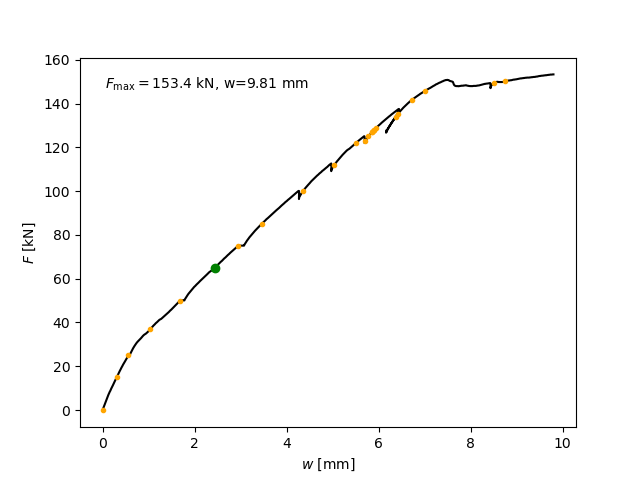

In [30]:
%matplotlib widget
_, ax = plt.subplots(1,1)
dic_grid.t = 0.2
dic_grid.plot_load_deflection(ax)

**Remark**: Correct the scaling - t should be between the min max values of the load

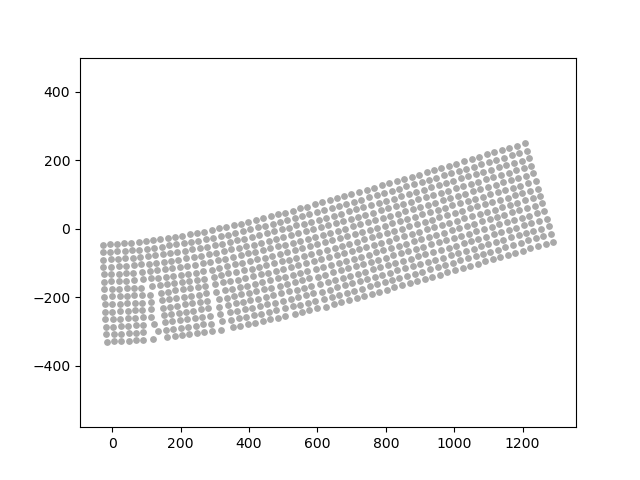

In [31]:
_, ax = plt.subplots(1,1)
dic_grid.plot_grid(ax)

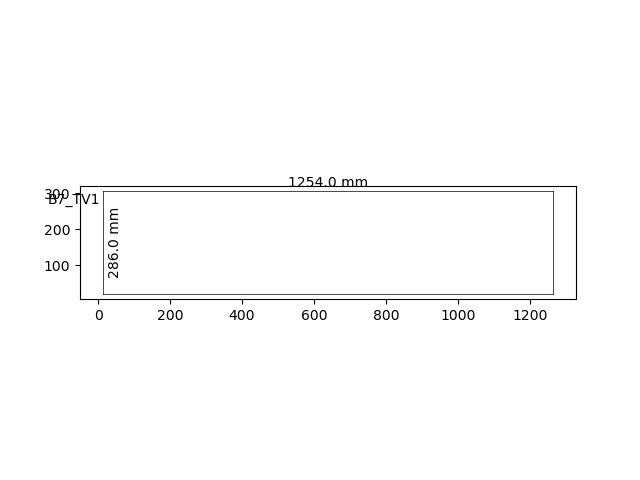

In [32]:
_, ax = plt.subplots(1,1)
dic_grid.plot_bounding_box(ax)
dic_grid.plot_box_annotate(ax)
ax.set_aspect('equal')